# Machine Learning Prototype for Zyfra 

This project aims to predict the amount of gold recovered from gold ore based on extraction and purification.

# 1.1

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [38]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [39]:
duplicates = train.duplicated().sum()
print(f'The amount of duplicated rows are: {duplicates}')
train.head()

The amount of duplicated rows are: 0


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [40]:
duplicates = test.duplicated().sum()
print(f'The amount of duplicated rows are: {duplicates}')
test.head()

The amount of duplicated rows are: 0


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [41]:
duplicates = full.duplicated().sum()
print(f'The amount of duplicated rows are: {duplicates}')
full.head()

The amount of duplicated rows are: 0


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [42]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

# 1.2

In [43]:
# Calculating recovery of au from concentrate 
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train ['rougher.output.tail_au']

train['calculated_recovery'] = (c * (f - t)) / (f * (c - t)) * 100

In [44]:
# Calculating Mean Absolute Error of the accuracy of the test sets 
validation = train.dropna(subset=['rougher.output.recovery', 'calculated_recovery'])
mae =  mean_absolute_error(validation['rougher.output.recovery'], validation['calculated_recovery'])
print(f'Mean Absolute Error of Recovery Calculation: {mae}')

Mean Absolute Error of Recovery Calculation: 9.303415616264301e-15


The Mean Absolute Error result being so close to zero indicates that the recovery calculations are accurate, with almost no difference between calculated values and the actual values in the dataset. 

# 1.3

In [45]:
print(test.columns)
print(train.columns)

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [46]:
set(train) - set(test)
missing_columns = list(set(train.columns)-set(test.columns))
print(missing_columns)

['rougher.calculation.floatbank10_sulfate_to_au_feed', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_ag', 'final.output.recovery', 'primary_cleaner.output.tail_au', 'final.output.tail_pb', 'rougher.calculation.au_pb_ratio', 'final.output.tail_au', 'rougher.output.tail_pb', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'final.output.tail_ag', 'rougher.output.tail_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_sol', 'rougher.output.tail_sol', 'secondary_cleaner.output.tail_sol', 'final.output.concentrate_pb', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_au', 'calculated_recovery', 'rou

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


# 1.4

In [48]:
train.isna().sum()

date                                             0
final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
                                              ... 
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
calculated_recovery                           2283
Length: 88, dtype: int64

In [49]:
test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [50]:
train = train.ffill()

In [51]:
test = test.ffill()

In [52]:
train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
calculated_recovery                           0
Length: 88, dtype: int64

In [53]:
test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [54]:
train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
calculated_recovery                           0
Length: 88, dtype: int64

# 2.1

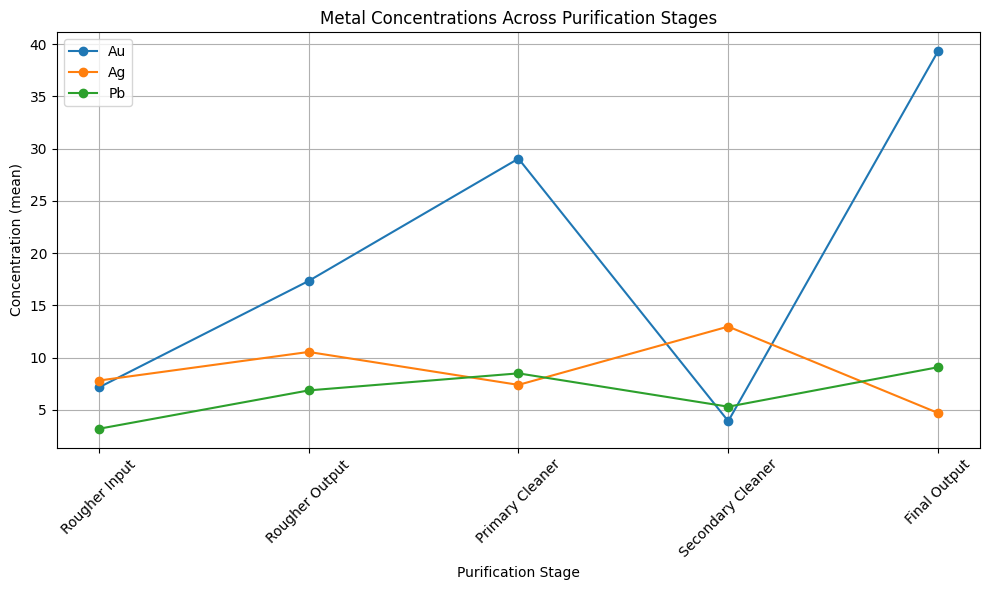

In [55]:
# Plotting changes in concentration throughout purification
stage_groups = {
    "Rougher Input": {
        "Au": "rougher.input.feed_au",
        "Ag": "rougher.input.feed_ag",
        "Pb": "rougher.input.feed_pb"
    },
    "Rougher Output": {
        "Au": "rougher.output.concentrate_au",
        "Ag": "rougher.output.concentrate_ag",
        "Pb": "rougher.output.concentrate_pb"
    },
    "Primary Cleaner": {
        "Au": "primary_cleaner.output.concentrate_au",
        "Ag": "primary_cleaner.output.concentrate_ag",
        "Pb": "primary_cleaner.output.concentrate_pb"
    },
    "Secondary Cleaner": {
        "Au": "secondary_cleaner.output.tail_au",
        "Ag": "secondary_cleaner.output.tail_ag",
        "Pb": "secondary_cleaner.output.tail_pb"
    },
    "Final Output": {
        "Au": "final.output.concentrate_au",
        "Ag": "final.output.concentrate_ag",
        "Pb": "final.output.concentrate_pb"
    }
}

# Calculating mean concentrations per stage
stage_data = []
for stage, metals in stage_groups.items():
    row = {"Stage": stage}
    for metal, col in metals.items():
        row[metal] = train[col].mean()
    stage_data.append(row)

stage_df = pd.DataFrame(stage_data)
plt.figure(figsize=(10, 6))
for metal in ["Au", "Ag", "Pb"]:
    plt.plot(stage_df["Stage"], stage_df[metal], marker="o", label=metal)

plt.xlabel("Purification Stage")
plt.ylabel("Concentration (mean)")
plt.title("Metal Concentrations Across Purification Stages")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.2

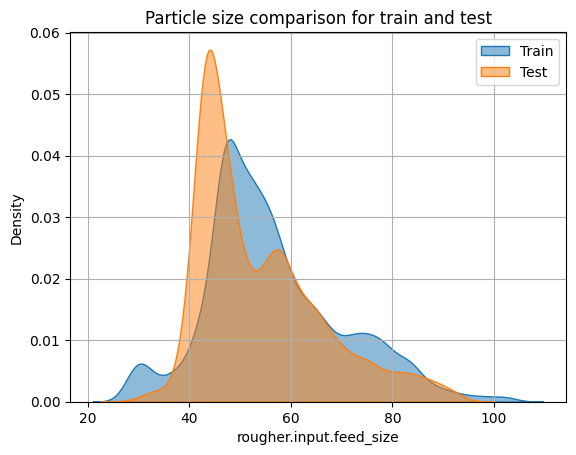

In [56]:
# Comparing feed size particle distribution
def filter_outliers(series):
    return series[(series >= series.quantile(0.01)) & (series <= series.quantile(0.97))]

def compare_train_test_feature(feature):
    sns.kdeplot(filter_outliers(train[feature]), label='Train', fill=True, alpha=0.5)
    sns.kdeplot(filter_outliers(test[feature]), label='Test', fill=True, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Particle size comparison for train and test')
    plt.legend()
    plt.grid(True)

    plt.show()

compare_train_test_feature('rougher.input.feed_size')

# 2.3

In [57]:
# Calculating total concentrations for each stage
train['total_raw_feed'] = train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
train['total_rougher_concentrate'] = train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
train['total_final_concentrate'] = train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)
print(train[['total_raw_feed', 'total_rougher_concentrate', 'total_final_concentrate']].describe())

       total_raw_feed  total_rougher_concentrate  total_final_concentrate
count    16860.000000               16860.000000             16860.000000
mean        50.443496                  59.961791                61.267542
std         18.176831                  24.042979                21.690164
min          0.000000                   0.000000                 0.000000
25%         50.290705                  61.468859                66.531283
50%         55.787615                  68.332115                68.803475
75%         60.262953                  73.020072                70.695552
max         76.024095                  90.964431                80.210644


It's practically impossible for industrial processes to have zero concentrations of any trace metals, this may be caused by sensor failures, data logging errors, or process interruptions.

In [58]:
# Removing zero concentrations
train_clean = train[
    (train['total_raw_feed'] > 0) & 
    (train['total_rougher_concentrate'] > 0) & 
    (train['total_final_concentrate'] > 0)
]

# Capping extreme highs (99th percentile)
upper_limits = train_clean[['total_raw_feed', 'total_rougher_concentrate', 'total_final_concentrate']].quantile(0.97)
train_clean['total_rougher_concentrate'] = train_clean['total_rougher_concentrate'].clip(upper=upper_limits['total_rougher_concentrate'])

print(train_clean[['total_raw_feed', 'total_rougher_concentrate', 'total_final_concentrate']].describe())

       total_raw_feed  total_rougher_concentrate  total_final_concentrate
count    15128.000000               15128.000000             15128.000000
mean        54.483573                  66.073215                66.492766
std         11.752856                  15.101046                12.802349
min          0.040000                   0.039898                 0.040000
25%         51.900059                  64.471834                67.319108
50%         56.410920                  69.116102                69.035040
75%         60.679102                  73.545525                70.856987
max         76.024095                  81.686148                80.210644


/tmp/ipykernel_34/2719704045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['total_rougher_concentrate'] = train_clean['total_rougher_concentrate'].clip(upper=upper_limits['total_rougher_concentrate'])


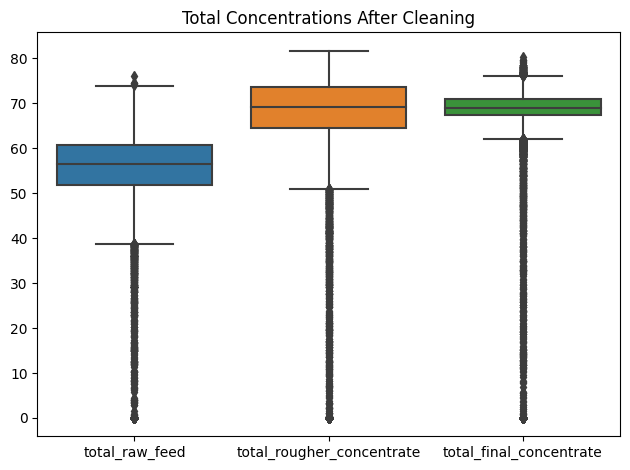

In [59]:
sns.boxplot(data=train_clean[['total_raw_feed', 'total_rougher_concentrate', 'total_final_concentrate']])
plt.title("Total Concentrations After Cleaning")
plt.tight_layout()
plt.show()

# 3.1

In [60]:
def smape(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denominator != 0
    return np.mean(100 * numerator[mask] / denominator[mask])

# Converting sMAPE to a scorer for cross validation
smape_scorer = make_scorer(smape, greater_is_better=False)
    

# 3.2

In [61]:
features = [
    'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_size',
    'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
    'rougher.output.tail_au', 'primary_cleaner.output.tail_au',
    'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_d_air',
    'primary_cleaner.state.floatbank8_a_level'
]

target = 'final.output.tail_au'

In [62]:
X_full = full[features]  
y_full = full[target]   

print("NaN in features:", X_full.isna().sum().sum())
print("Infinity in features:", np.isinf(X_full).sum().sum())
print("NaN in target:", y_full.isna().sum())
print("Infinity in target:", np.isinf(y_full).sum())

NaN in features: 4961
Infinity in features: 0
NaN in target: 81
Infinity in target: 0


In [63]:
# Forward fill
X_full_ffill = full[features].ffill()  
y_full_ffill = full[target].ffill() 

In [64]:
print("Remaining NaN in features:", X_full_ffill.isna().sum().sum())  
print("Remaining NaN in target:", y_full_ffill.isna().sum())     

Remaining NaN in features: 0
Remaining NaN in target: 0


In [65]:
print("Infinity in features:", np.isinf(X_full_ffill).sum().sum())
print("Infinity in target:", np.isinf(y_full_ffill).sum())

Infinity in features: 0
Infinity in target: 0


In [66]:
X_full_ffill = X_full_ffill.clip(lower=-1e6, upper=1e6)  

In [67]:
print(X_full_ffill.shape, y_full_ffill.shape)

(22716, 10) (22716,)


In [68]:
print(type(y_full_ffill))

<class 'pandas.core.series.Series'>


In [69]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=12),
}

kf = KFold(n_splits=5, shuffle=True, random_state=12) 

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_full_ffill, y_full_ffill, cv=kf, scoring=smape_scorer)
    results[name] = {
        'Mean SMAPE': f"{-scores.mean():.2f}%",
        'Std Dev': f"{scores.std():.2f}"
    }


display(pd.DataFrame(results).T) 

,Mean SMAPE,Std Dev
Linear Regression,29.42%,0.77
Random Forest,13.29%,0.35


In [70]:
full = full.ffill()

In [71]:
common_columns = X_full_ffill.columns.intersection(X_full_ffill.columns)
X = X_full_ffill[common_columns]  
y = full['final.output.tail_au']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error on Validation Set: {mae:.2f}')

Mean Absolute Error on Validation Set: 0.39


In [72]:
test_smape = smape(y_val, y_pred)
print(f"Final Test sMAPE: {test_smape:.2f}%")

Final Test sMAPE: 29.32%


# Conclusion

This project allowed for a comprehensive understanding of how mining develops as gold is extracted from earth, processed and purified, then turned into items of utility and jewelry. 